# Why broadband phase is **not** a *thing*, 
## as illustrated by the Hilbert transform

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as sig
import scipy.fft as fft
from scipy.signal import butter, lfilter, freqz, filtfilt, hilbert

Many papers deal with phase relationships between signals collected at different time points or at different locations, and/or different frequencies (cross-frequency coupling). Surprisingly many of these analyses are unlikely to have worked because they measured phase from broadband signals. This walkthrough uses the hilbert transform to show why broad band phase is not a thing and how not taking this seriously yield spurious results that will never ever replicate. 

First load exampe data.  

(Make sure the data are in the current directory, or in the path.)

In [2]:
bop_107 = sio.loadmat('../data/bop_107.fl40h1.E1.app2.mat')
outmat = bop_107['outmat']

tx = sio.loadmat('../data/taxis.mat')
taxis = np.squeeze(tx['taxis'].copy())

print(outmat.shape)

(129, 2551, 48)


In [3]:
print(taxis[0],' : ',taxis[-1], '; time:', taxis[-1]-taxis[0], 'ms')
print('sample rate:',2550/5.1)

-3600  :  1500 ; time: 5100 ms
sample rate: 500.00000000000006


Text(0.5, 1.0, 'Our example data')

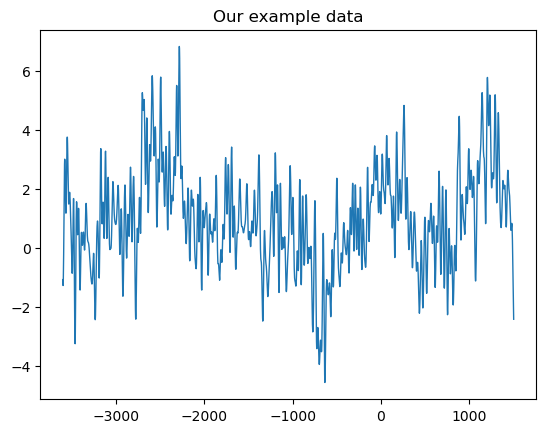

In [4]:
SampRate = 500
data = outmat[:,:,:] # loads our example data set (129 sensors, 2551 points,  48 trials)
data = np.squeeze(outmat[128,:, 1]).T  # the second trial, sensor Cz. 

plt.figure()
plt.plot(taxis,data,linewidth=1)
plt.title ('Our example data')


Next filter the signal a bit, but not enough...let us start with 7 to 12 Hz, often used in the literature, 


Text(0.5, 1.0, ' signal, filtered 7 to 12 Hz')

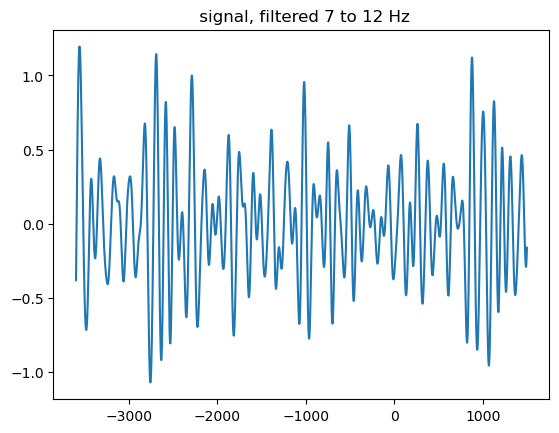

In [5]:
blow,alow = butter(4, 11/250, btype='low')   # 12 Hz lowpass when sampled at 500 Hz
siglow = filtfilt(blow, alow, data)

bhigh,ahigh = butter(2, 6/250, btype='high') # 7 Hz highpass (2nd order) when sampled at 500 Hz
sighighlow = filtfilt(bhigh, ahigh, siglow)

plt.figure()
plt.plot(taxis, sighighlow)
plt.title(' signal, filtered 7 to 12 Hz')

Now we apply the Hilbert transform. It estimates the local phase time-point by time point and creates a version that is shifted by 90 degrees. it is often used in CFC studies. For example 4 Hz in Canolty et al. Science 2016


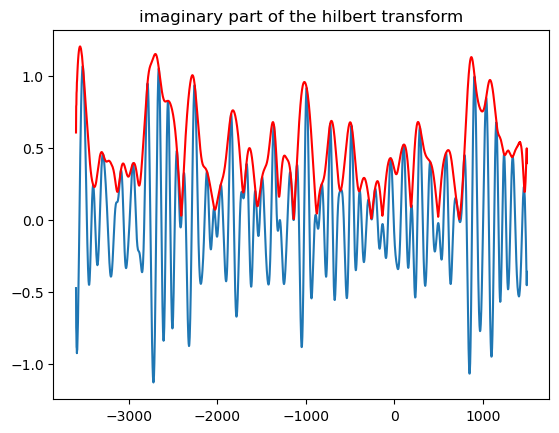

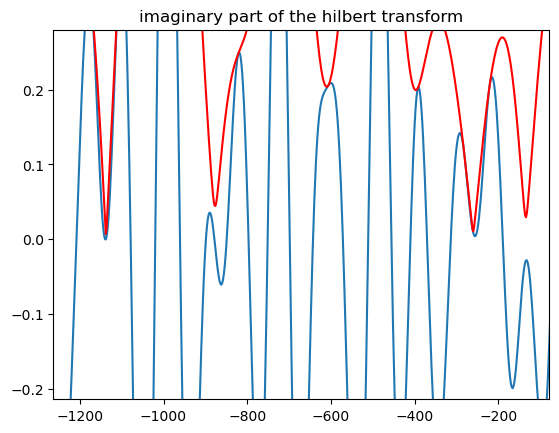

In [9]:
test = hilbert(sighighlow)
plt.figure()
plt.plot(taxis, test.imag)
plt.plot(taxis, np.abs(test), 'r')
plt.title('imaginary part of the hilbert transform')


plt.figure()
plt.plot(taxis, test.imag)
plt.plot(taxis, np.abs(test), 'r')
plt.title('imaginary part of the hilbert transform')
plt.xlim([-1263, -78])
plt.ylim([-0.214, 0.280])
plt.show()


In [ ]:
plt.figure()
plt.plot(taxis, np.angle(test))
plt.title('screwed up phase :-)')
plt.xlim([-3141, -2698])
plt.ylim([-2.71, 2.63])
plt.show()

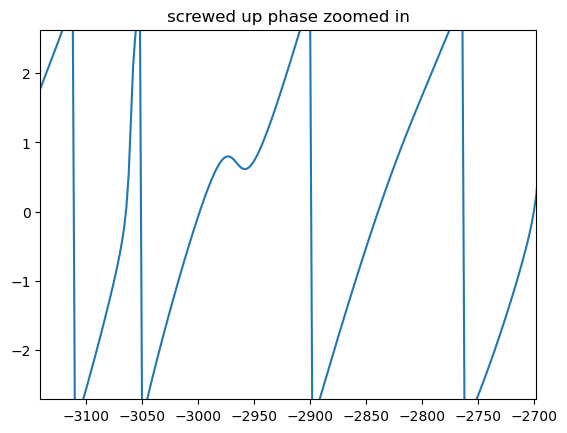

In [9]:
plt.figure()
plt.plot(taxis, np.angle(test))
plt.xlim(-3141, -2698)
plt.ylim([-2.71, 2.63])
plt.title('screwed up phase zoomed in')
plt.show()

Now do it again, with narrow band bass :) 

Text(0.5, 1.0, ' new signal, hilbert analytical signal, and envelope')

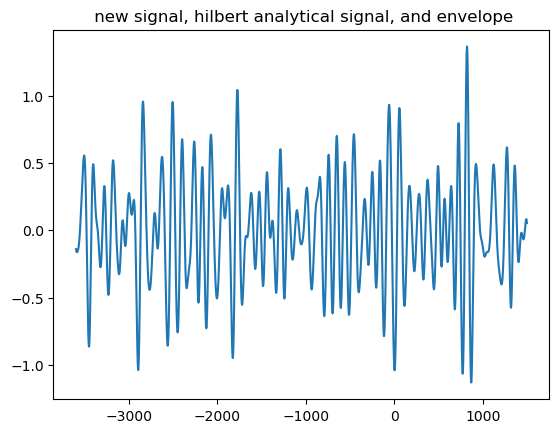

In [10]:
alow,blow = butter(4, 12/250)   # 12 Hz lowpass when sampled at 500 Hz
siglow = filtfilt(alow, blow, data)
ahigh,bhigh = butter(2, 7/250, 'high') # 7 Hz highpass (2nd order) when sampled at 500 Hz

sighighlow = filtfilt(ahigh, bhigh, siglow)

plt.figure()
plt.plot(taxis, sighighlow)
plt.title(' new signal, hilbert analytical signal, and envelope')

Text(0.5, 1.0, 'imaginary part of the hilbert transform')

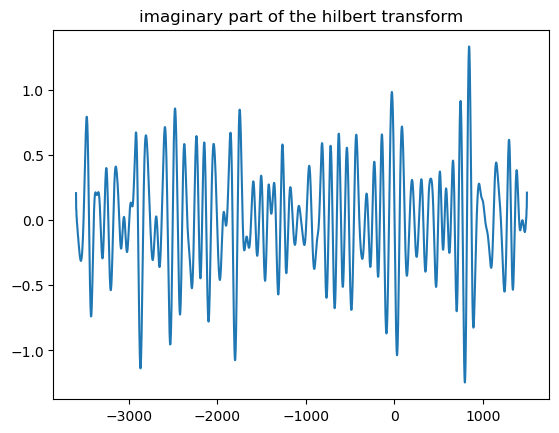

In [11]:
test = hilbert(sighighlow)

plt.figure()

plt.plot(taxis, test.imag)
plt.title('imaginary part of the hilbert transform')


Text(0.5, 1.0, 'still pretty bad phase')

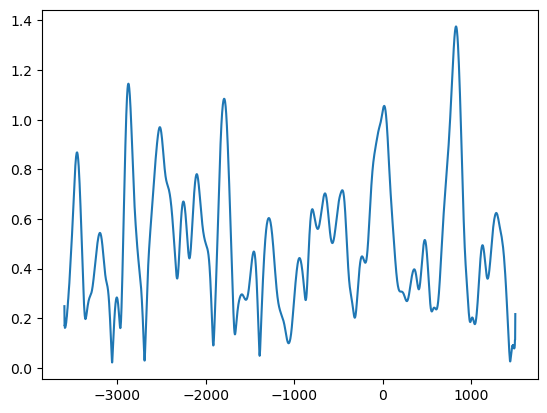

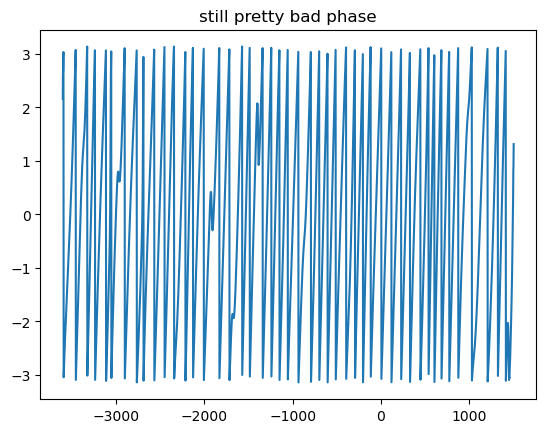

In [12]:
plt.figure()
plt.plot(taxis, np.abs(test))

plt.figure()
plt.plot(taxis, np.angle(test))

plt.title('still pretty bad phase')

Now do it again, with narrow band pass

Text(0.5, 1.0, ' new signal, hilbert analytical signal, and envelope')

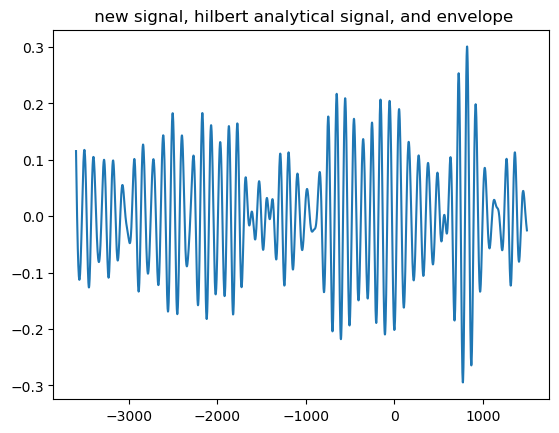

In [13]:
alow, blow = butter(6, 10/250)   # lowpass when sampled at 500 Hz
siglow = filtfilt(alow, blow, data)

ahigh, bhigh = butter(6, 10/250, 'high') #  highpass (2nd order) when sampled at 500 Hz 
sighighlow = filtfilt(ahigh, bhigh, siglow)

plt.figure()
plt.plot(taxis, sighighlow)
plt.title(' new signal, hilbert analytical signal, and envelope')

Text(0.5, 1.0, 'that is smooth phase !')

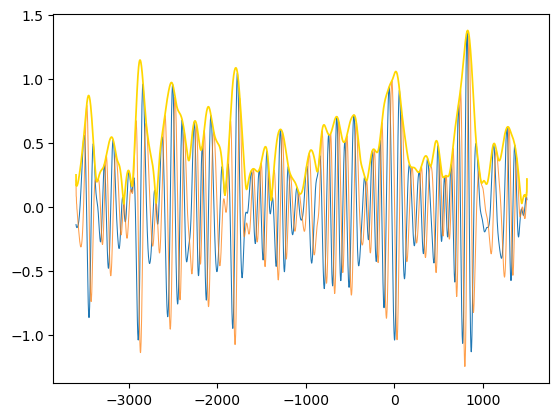

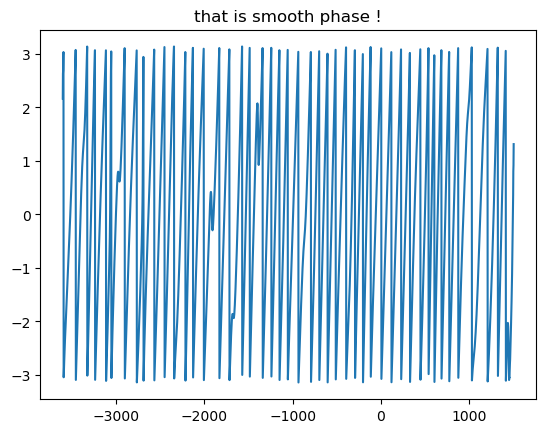

In [18]:
test = hilbert(sighighlow)

plt.figure()
plt.plot(taxis, test.real,linewidth=0.75)
plt.plot(taxis, test.imag,alpha=0.75,linewidth=0.75)
plt.plot(taxis, np.abs(test),'gold',linewidth=1.25)

plt.figure()
plt.plot(taxis, np.angle(test))
plt.title('that is smooth phase !')